
# 7.2: Intersections of lines

In [89]:

%load_ext autoreload
%autoreload 2
from jupyterthemes import jtplot
jtplot.style()

from ch07.vectors import *
from ch07.functions import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 7.24: Solving matrices with numpy

In [90]:
import numpy as np
matrix = np.array(( (1, -1), (1, 2) ))
output = np.array( (0, 8) )
vector = np.linalg.solve(matrix, output)
vector

array([2.66666667, 2.66666667])

Exercise 7.11: Write a Python function standard_form that takes two vectors v1 and v2 and finds the line ax + by = c
passing through both of them. Specifically, it should output the tuple of constants (a, b, c).

In [91]:
standard_form( (3,0), (3,1) )

(1, 0, 3)

Exercise 7.10: Draw a graph for (3, 0) + t (0, 1) and convert it to the standard form using the formula.

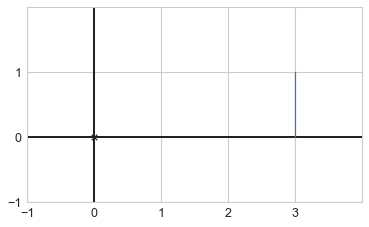

(3, 0), (3, 1)
1x + 0y = 3


In [92]:
from ch05.vector_drawing import *

def compute_line():
    point = lambda t: add( (3,0), scale(t, (0, 1)) )
    start = point(0)
    end = point(1)
    return Segment(start, end)

line = compute_line()
draw(line)

x1, y1 = line.start_point
x2, y2 = line.end_point

print("({}, {}), ({}, {})".format(x1, y1, x2, y2))

a = y2 - y1
b = x1 - x2
c = ( x1 * y2 ) - (x2 * y1)
print("{}x + {}y = {}".format(a, b, c))




Mini-project 7.12: For each of the four distance checks in do_segments_intersect, find a pair of line segments
that fail one of the checks but pass the other three checks.

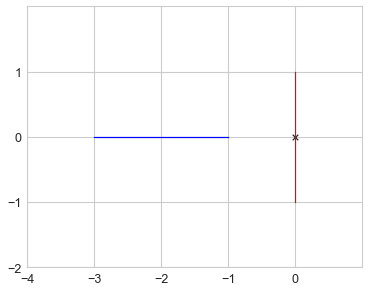

[False, True, True, True]

In [93]:
def segment_checks(u_start, u_end, v_start, v_end):
    u_len = distance(u_start, u_end)
    v_len = distance(v_start, v_end)
    i = intersection(u_start, u_end, v_start, v_end)
    #i = (0,0)

    checks = []

    checks.append( distance(u_start, i) <= u_len )
    checks.append( distance(u_end, i) <= u_len )
    checks.append( distance(v_start, i) <= v_len )
    checks.append(distance(v_end, i) <= v_len)

    u = Segment(u_start, u_end, color='blue')
    v = Segment(v_start, v_end, color='red')
    draw(u, v, axes=None)

    return checks

# u is y = 0 (horizontal line)
# v is x = 0 (vertical line)
# the only intersection is at origin (0,0)

segment_checks((-3,0),(-1,0),(0,-1),(0,1))

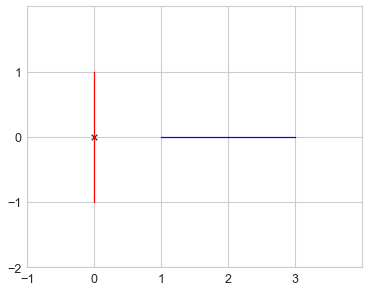

[True, False, True, True]

In [94]:
segment_checks((1,0),(3,0),(0,-1),(0,1))

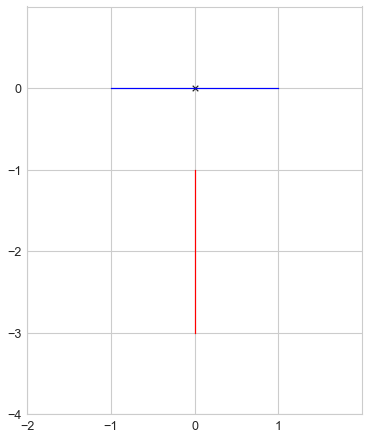

[True, True, False, True]

In [95]:
segment_checks((-1,0),(1,0),(0,-3),(0,-1))

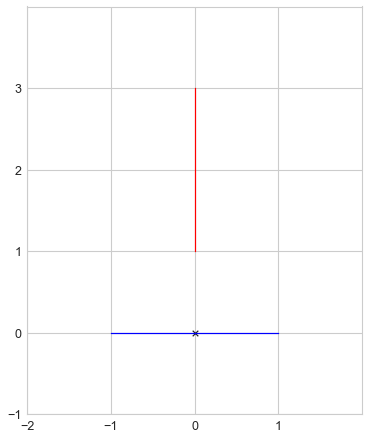

[True, True, True, False]

In [96]:
segment_checks((-1,0),(1,0),(0,1),(0,3))

Exercise 7.13: For the example laser line and asteroid, confirm the does_intersect function returns True.

In [100]:
from ch07.asteroids import PolygonModel
asteroid = PolygonModel([(2,7), (1,5), (2,3), (4,2), (6,2), (7,4), (6,6), (4,6)])
asteroid.does_intersect([(0,0),(7,7)])

True

In [101]:
asteroid.does_intersect([(0,0),(0,7)])

False

Exercise 7.14: Write a does_collide(other_polygon) method to decide whether the current PolygonModel
object collides with another other_polygon by checking whether any of the segments that define the two are
intersecting. This could help us decide whether an asteroid has hit the ship or another asteroid.

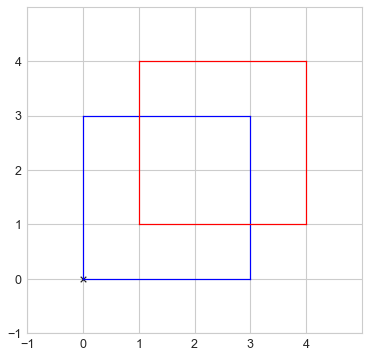

True

In [106]:
square1 = PolygonModel([(0,0), (3,0), (3,3), (0,3)])
square2 = PolygonModel([(1,1), (4,1), (4,4), (1,4)])
draw(
    Polygon(*square1.points, color='blue'),
    Polygon(*square2.points, color='red'),
axes=None)

square1.does_collide(square2)

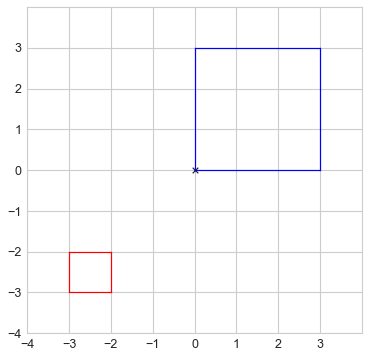

False

In [105]:

square3 = PolygonModel([(-3,-3),(-2,-3),(-2,-2),(-3,-2)])
draw(
    Polygon(*square1.points, color='blue'),
    Polygon(*square3.points, color='red'),
axes=None)

square1.does_collide(square3)